
# Multi-objective Bayesian Optimization


TNK function
$n=2$ variables:
$x_i \in [0, \pi], i=1,2$

Objectives:
- $f_i(x) = x_i$

Constraints:
- $g_1(x) = -x_1^2 -x_2^2 + 1 + 0.1 \cos\left(16 \arctan \frac{x_1}{x_2}\right) \le 0$
- $g_2(x) = (x_1 - 1/2)^2 + (x_2-1/2)^2 \le 0.5$

In [1]:
# set values if testing
import os

import pandas as pd
import numpy as np
import torch

from xopt import Xopt, Evaluator
from xopt.generators.bayesian import MOBOGenerator
from xopt.resources.test_functions.tnk import evaluate_TNK, tnk_vocs

from xopt.generators.bayesian.objectives import feasibility

import matplotlib.pyplot as plt

# Ignore all warnings
import warnings

warnings.filterwarnings("ignore")

SMOKE_TEST = os.environ.get("SMOKE_TEST")
N_MC_SAMPLES = 1 if SMOKE_TEST else 128
NUM_RESTARTS = 1 if SMOKE_TEST else 20
N_STEPS = 1 if SMOKE_TEST else 30

evaluator = Evaluator(function=evaluate_TNK)
print(tnk_vocs.dict())

{'variables': {'x1': [0.0, 3.14159], 'x2': [0.0, 3.14159]}, 'constraints': {'c1': ['GREATER_THAN', 0.0], 'c2': ['LESS_THAN', 0.5]}, 'objectives': {'y1': 'MINIMIZE', 'y2': 'MINIMIZE'}, 'constants': {'a': 'dummy_constant'}, 'observables': []}


In [2]:
generator = MOBOGenerator(vocs=tnk_vocs, reference_point={"y1": 1.5, "y2": 1.5})
generator.n_monte_carlo_samples = N_MC_SAMPLES
generator.numerical_optimizer.n_restarts = NUM_RESTARTS

X = Xopt(generator=generator, evaluator=evaluator, vocs=tnk_vocs)
X.evaluate_data(pd.DataFrame({"x1": [1.0, 0.75], "x2": [0.75, 1.0]}))

for i in range(N_STEPS):
    print(i)
    X.step()

0


1


2


3


4


5


6


7


8


9


10


11


12


13


14


15


16


17


18


19


20


21


22


23


24


25


26


27


28


29


In [3]:
X.generator.data

x1        x2               a        y1        y2        c1  \
0   1.000000  0.750000  dummy_constant  1.000000  0.750000  0.626888   
1   0.750000  1.000000  dummy_constant  0.750000  1.000000  0.626888   
2   1.666731  0.184143  dummy_constant  1.666731  0.184143  1.830762   
3   0.000000  0.000000  dummy_constant  0.000000  0.000000 -1.100000   
4   0.712458  0.000000  dummy_constant  0.712458  0.000000 -0.592404   
5   1.048468  0.000000  dummy_constant  1.048468  0.000000 -0.000716   
6   1.016840  0.191916  dummy_constant  1.016840  0.191916  0.169567   
7   0.382267  0.720884  dummy_constant  0.382267  0.720884 -0.339476   
8   0.529438  0.826468  dummy_constant  0.529438  0.826468  0.058619   
9   0.000000  3.141590  dummy_constant  0.000000  3.141590  8.769588   
10  0.007721  0.902593  dummy_constant  0.007721  0.902593 -0.284332   
11  0.891323  0.062839  dummy_constant  0.891323  0.062839 -0.244609   
12  0.348651  1.323468  dummy_constant  0.348651  1.323468  0.928845   
13  0.109686  1.056399  dummy_constant  0.109686  1.056399  0.136456   
14  0.806709  0.555371  dummy_constant  0.806709  0.555371  0.056762   
15  0.123526  0.474276  dummy_constant  0.123526  0.474276 -0.700426   
16  1.030330  0.059412  dummy_constant  1.030330  0.059412  0.004655   
17  0.911760  0.337954  dummy_constant  0.911760  0.337954 -0.136798   
18  0.427205  0.920086  dummy_constant  0.427205  0.920086 -0.049203   
19  0.700608  0.732041  dummy_constant  0.700608  0.732041 -0.067169   
20  1.131363  0.152008  dummy_constant  1.131363  0.152008  0.356726   
21  0.892492  0.465485  dummy_constant  0.892492  0.465485 -0.002920   
22  0.043501  1.023376  dummy_constant  0.043501  1.023376 -0.028585   
23  0.067741  1.100187  dummy_constant  0.067741  1.100187  0.159623   
24  0.786330  0.630806  dummy_constant  0.786330  0.630806  0.033949   
25  0.833251  0.070666  dummy_constant  0.833251  0.070666 -0.322241   
26  0.336179  0.980778  dummy_constant  0.336179  0.980778  0.020888   
27  1.157066  0.187943  dummy_constant  1.157066  0.187943  0.458572   
28  0.221648  1.007891  dummy_constant  0.221648  1.007891  0.159837   
29  0.002339  1.044120  dummy_constant  0.002339  1.044120 -0.009743   
30  0.013514  0.658144  dummy_constant  0.013514  0.658144 -0.661317   
31  1.297223  0.059175  dummy_constant  1.297223  0.059175  0.611729   

          c2  xopt_runtime  xopt_error  
0   0.312500      0.000156       False  
1   0.312500      0.000133       False  
2   1.461026      0.000158       False  
3   0.500000      0.000147       False  
4   0.295138      0.000151       False  
5   0.550817      0.000151       False  
6   0.362039      0.000151       False  
7   0.062651      0.000150       False  
8   0.107448      0.000152       False  
9   7.227998      0.000149       False  
10  0.404419      0.000150       False  
11  0.344244      0.000151       False  
12  0.701005      0.000145       False  
13  0.461925      0.000148       False  
14  0.097137      0.000150       False  
15  0.142394      0.000150       False  
16  0.475368      0.000150       False  
17  0.195805      0.000151       False  
18  0.181771      0.000151       False  
19  0.094086      0.000151       False  
20  0.519717      0.000153       False  
21  0.155241      0.000147       False  
22  0.482314      0.000146       False  
23  0.547073      0.000112       False  
24  0.099095      0.000162       False  
25  0.295384      0.000151       False  
26  0.257985      0.000148       False  
27  0.529116      0.000153       False  
28  0.335433      0.000149       False  
29  0.543733      0.000151       False  
30  0.261678      0.000153       False  
31  0.829891      0.000150       False

## plot results


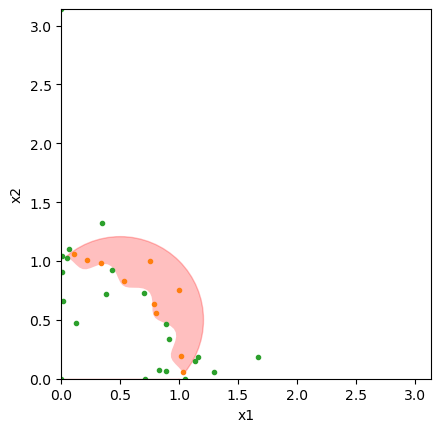

In [4]:
fig, ax = plt.subplots()

theta = np.linspace(0, np.pi / 2)
r = np.sqrt(1 + 0.1 * np.cos(16 * theta))
x_1 = r * np.sin(theta)
x_2_lower = r * np.cos(theta)
x_2_upper = (0.5 - (x_1 - 0.5) ** 2) ** 0.5 + 0.5

z = np.zeros_like(x_1)

# ax2.plot(x_1, x_2_lower,'r')
ax.fill_between(x_1, z, x_2_lower, fc="white")
circle = plt.Circle(
    (0.5, 0.5), 0.5**0.5, color="r", alpha=0.25, zorder=0, label="Valid Region"
)
ax.add_patch(circle)
history = pd.concat(
    [X.data, tnk_vocs.feasibility_data(X.data)], axis=1, ignore_index=False
)


ax.plot(*history[["x1", "x2"]][history["feasible"]].to_numpy().T, ".C1")
ax.plot(*history[["x1", "x2"]][~history["feasible"]].to_numpy().T, ".C2")

ax.set_xlim(0, 3.14)
ax.set_ylim(0, 3.14)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_aspect("equal")

### Plot path through input space

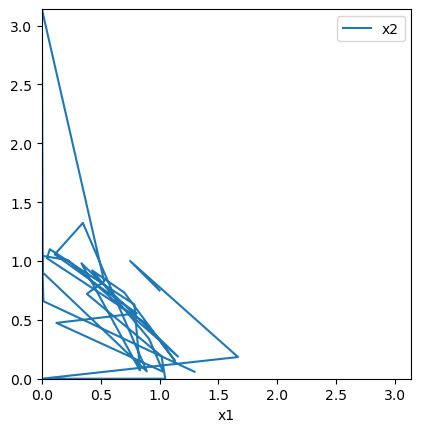

In [5]:
ax = history.plot("x1", "x2")
ax.set_ylim(0, 3.14)
ax.set_xlim(0, 3.14)
ax.set_aspect("equal")

[[1.04054409 0.05090183]]


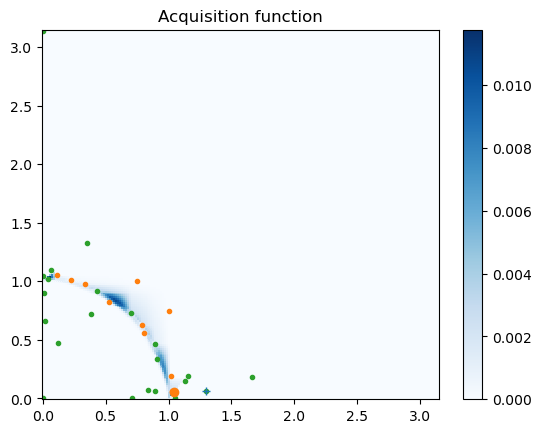

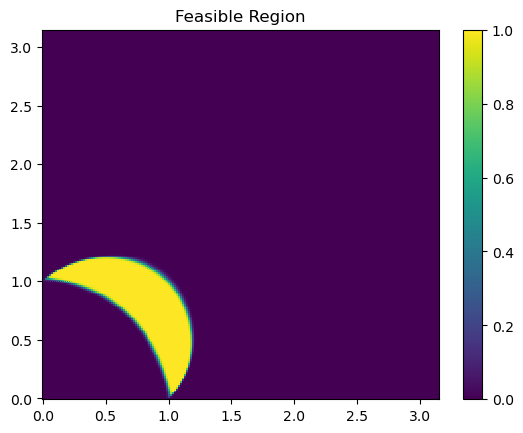

In [6]:
# plot the acquisition function
bounds = X.generator.vocs.bounds
model = X.generator.model

# create mesh
n = 200
x = torch.linspace(*bounds.T[0], n)
y = torch.linspace(*bounds.T[1], n)
xx, yy = torch.meshgrid(x, y)
pts = torch.hstack([ele.reshape(-1, 1) for ele in (xx, yy)]).double()

xx, yy = xx.numpy(), yy.numpy()

acq_func = X.generator.get_acquisition(model)
with torch.no_grad():
    acq_pts = pts.unsqueeze(1)
    acq = acq_func(acq_pts)

    fig, ax = plt.subplots()
    c = ax.pcolor(xx, yy, acq.reshape(n, n), cmap="Blues")
    fig.colorbar(c)
    ax.set_title("Acquisition function")

    ax.plot(*history[["x1", "x2"]][history["feasible"]].to_numpy().T, ".C1")
    ax.plot(*history[["x1", "x2"]][~history["feasible"]].to_numpy().T, ".C2")

    ax.plot(*history[["x1", "x2"]].to_numpy()[-1].T, "+")

    feas = feasibility(pts.unsqueeze(1), model, tnk_vocs).flatten()

    fig2, ax2 = plt.subplots()
    c = ax2.pcolor(xx, yy, feas.reshape(n, n))
    fig2.colorbar(c)
    ax2.set_title("Feasible Region")

candidate = pd.DataFrame(X.generator.generate(1), index=[0])
print(candidate[["x1", "x2"]].to_numpy())
ax.plot(*candidate[["x1", "x2"]].to_numpy()[0], "o")

In [7]:
%%time
candidate = X.generator.generate(1)

CPU times: user 2.56 s, sys: 61.9 ms, total: 2.62 s
Wall time: 1.31 s
